In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('D:/Uni/211/495/deepnlpdataset'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Uni/211/495/deepnlpdataset\Sheet_1.csv
D:/Uni/211/495/deepnlpdataset\Sheet_2.csv


In [2]:
#load Data
df1=pd.read_csv("D:/Uni/211/495/deepnlpdataset/Sheet_1.csv",encoding='latin-1')
df2=pd.read_csv("D:/Uni/211/495/deepnlpdataset/Sheet_2.csv",encoding='latin-1')

df1.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [3]:
df1 = df1.drop(["Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6","Unnamed: 7"], axis = 1)
df1 = df1.rename(columns={"class":"Sentiment", "response_text":"Labels"})
df1.head()

,response_id,Sentiment,Labels
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [4]:
df2 = df2.drop(["resume_id"], axis = 1)
df2 = df2.rename(columns={"class":"Sentiment", "resume_text":"Labels"})
df2.head()

,Sentiment,Labels
0,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [5]:
combine_df  = pd.concat([df1,df2])
combine_df.head()

,response_id,Sentiment,Labels
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [6]:
combine_df.replace(('flagged','not_flagged'),(1,0),inplace=True)

combine_df.head()

,response_id,Sentiment,Labels
0,response_1,0,I try and avoid this sort of conflict
1,response_2,1,Had a friend open up to me about his mental ad...
2,response_3,1,I saved a girl from suicide once. She was goin...
3,response_4,0,i cant think of one really...i think i may hav...
4,response_5,0,Only really one friend who doesn't fit into th...


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences=combine_df['Labels'].tolist()
labels=combine_df['Sentiment'].tolist()

In [8]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [9]:
#Sequential Model

In [10]:
vocab_size = 300
embedding_dim = 100
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 100)           30000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 606       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 30,613
Trainable params: 30,613
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
6/6 [==============================] - 1s 26ms/step - loss: 0.6894 - accuracy: 0.6159 - val_loss: 0.6842 - val_accuracy: 0.7317
Epoch 2/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.7134 - val_loss: 0.6703 - val_accuracy: 0.7317
Epoch 3/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.7134 - val_loss: 0.6569 - val_accuracy: 0.7317
Epoch 4/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.7134 - val_loss: 0.6446 - val_accuracy: 0.7317
Epoch 5/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.7134 - val_loss: 0.6328 - val_accuracy: 0.7317
Epoch 6/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7134 - val_loss: 0.6216 - val_accuracy: 0.7317
Epoch 7/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.7134 - val_loss: 0.6127 - val_accuracy: 0.7317
Epoch 8/30
6/6 [=================

In [12]:
vocab_size = 300
embedding_dim = 150
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 150)           45000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 906       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 45,913
Trainable params: 45,913
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
6/6 [==============================] - 0s 21ms/step - loss: 0.6960 - accuracy: 0.4329 - val_loss: 0.6868 - val_accuracy: 0.7317
Epoch 2/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.7134 - val_loss: 0.6802 - val_accuracy: 0.7317
Epoch 3/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.7134 - val_loss: 0.6744 - val_accuracy: 0.7317
Epoch 4/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.7134 - val_loss: 0.6677 - val_accuracy: 0.7317
Epoch 5/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.7134 - val_loss: 0.6605 - val_accuracy: 0.7317
Epoch 6/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.7134 - val_loss: 0.6528 - val_accuracy: 0.7317
Epoch 7/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.7134 - val_loss: 0.6436 - val_accuracy: 0.7317
Epoch 8/30
6/6 [=================

In [14]:
vocab_size = 300
embedding_dim = 200
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 200)           60000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1206      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 61,213
Trainable params: 61,213
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
6/6 [==============================] - 1s 22ms/step - loss: 0.6885 - accuracy: 0.6524 - val_loss: 0.6849 - val_accuracy: 0.7317
Epoch 2/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.7134 - val_loss: 0.6718 - val_accuracy: 0.7317
Epoch 3/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.7134 - val_loss: 0.6598 - val_accuracy: 0.7317
Epoch 4/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.7134 - val_loss: 0.6472 - val_accuracy: 0.7317
Epoch 5/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.7134 - val_loss: 0.6332 - val_accuracy: 0.7317
Epoch 6/30
6/6 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.7134 - val_loss: 0.6211 - val_accuracy: 0.7317
Epoch 7/30
6/6 [==============================] - 0s 4ms/step - loss: 0.6103 - accuracy: 0.7134 - val_loss: 0.6098 - val_accuracy: 0.7317
Epoch 8/30
6/6 [=================

In [16]:
vocab_size = 300
embedding_dim = 200
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(130),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 25, 200)           60000     
_________________________________________________________________
lstm (LSTM)                  (None, 130)               172120    
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 786       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 232,913
Trainable params: 232,913
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
6/6 [==============================] - 2s 87ms/step - loss: 0.6523 - accuracy: 0.7256 - val_loss: 0.6000 - val_accuracy: 0.7317
Epoch 2/30
6/6 [==============================] - 0s 16ms/step - loss: 0.5996 - accuracy: 0.7134 - val_loss: 0.5800 - val_accuracy: 0.7317
Epoch 3/30
6/6 [==============================] - 0s 16ms/step - loss: 0.5672 - accuracy: 0.7134 - val_loss: 0.5960 - val_accuracy: 0.7317
Epoch 4/30
6/6 [==============================] - 0s 17ms/step - loss: 0.5662 - accuracy: 0.7134 - val_loss: 0.6076 - val_accuracy: 0.7317
Epoch 5/30
6/6 [==============================] - 0s 17ms/step - loss: 0.5491 - accuracy: 0.7134 - val_loss: 0.5747 - val_accuracy: 0.7317
Epoch 6/30
6/6 [==============================] - 0s 17ms/step - loss: 0.5302 - accuracy: 0.7134 - val_loss: 0.5794 - val_accuracy: 0.7317
Epoch 7/30
6/6 [==============================] - 0s 16ms/step - loss: 0.5007 - accuracy: 0.7134 - val_loss: 0.5810 - val_accuracy: 0.7317
Epoch 8/30
6/6 [===========

In [18]:
vocab_size = 300
embedding_dim = 250
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(130),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 25, 250)           75000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 130)               198120    
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 786       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 273,913
Trainable params: 273,913
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
6/6 [==============================] - 2s 119ms/step - loss: 0.6652 - accuracy: 0.6402 - val_loss: 0.6182 - val_accuracy: 0.7317
Epoch 2/30
6/6 [==============================] - 0s 18ms/step - loss: 0.6095 - accuracy: 0.7134 - val_loss: 0.5805 - val_accuracy: 0.7317
Epoch 3/30
6/6 [==============================] - 0s 18ms/step - loss: 0.5734 - accuracy: 0.7134 - val_loss: 0.5805 - val_accuracy: 0.7317
Epoch 4/30
6/6 [==============================] - 0s 17ms/step - loss: 0.5616 - accuracy: 0.7134 - val_loss: 0.5909 - val_accuracy: 0.7317
Epoch 5/30
6/6 [==============================] - 0s 17ms/step - loss: 0.5509 - accuracy: 0.7134 - val_loss: 0.5902 - val_accuracy: 0.7317
Epoch 6/30
6/6 [==============================] - 0s 17ms/step - loss: 0.5256 - accuracy: 0.7256 - val_loss: 0.5886 - val_accuracy: 0.7317
Epoch 7/30
6/6 [==============================] - 0s 17ms/step - loss: 0.4863 - accuracy: 0.7378 - val_loss: 0.6697 - val_accuracy: 0.7317
Epoch 8/30
6/6 [==========

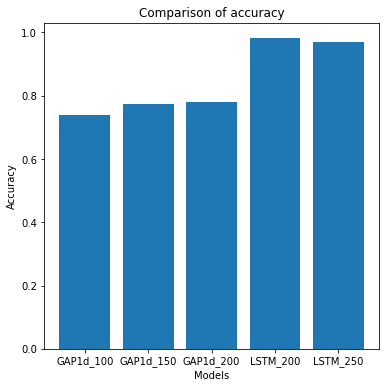

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
 
data = {'GAP1d_100':0.7378, 'GAP1d_150':0.7744, 'GAP1d_200':0.7805, 'LSTM_200':0.9817, 'LSTM_250':0.9695} 
courses = list(data.keys()) 
values = list(data.values()) 
fig = plt.figure(figsize = (6, 6)) 

plt.bar(courses, values) 

plt.xlabel("Models") 
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracy") 
plt.savefig("Sentence_distribution.jpg", dpi=300)
plt.show()